# *Iris Species Classification uisng Decision Tree Algorithm*

The aim is to design a model having capability to classify different species of Iris Plant. For this a Decision Tree Classifier is trained on Iris data that after training predict a specy of Iris Plant based on different parameters including "Petal Width", "Peatal Length", "Sepal Width", "Sepal Length".

## Libraries

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix, classification_report

## Dataset

In [51]:
data = pd.read_csv('./Data/Iris.csv').drop(columns='Id')
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


This dataset contains 3 classes of 150 examples each and each class alludes to a sort of iris plant. The dataset has four highlights: sepal length, sepal width, petal length, and petal width. The fifth segment is for species, which holds the incentive for types of plants. For instance, one of the kinds is a Setosa.

In [52]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data values are not broadly separated because standard deviations do not contain higher values which indicates that more of the data is clustered about the mean.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


All features have "float" type data except for the label column which contains "object" type data.

In [54]:
# Checking for missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the data.

## Exploratory Data Analysis

Text(0.5, 0.98, 'Before Classification')

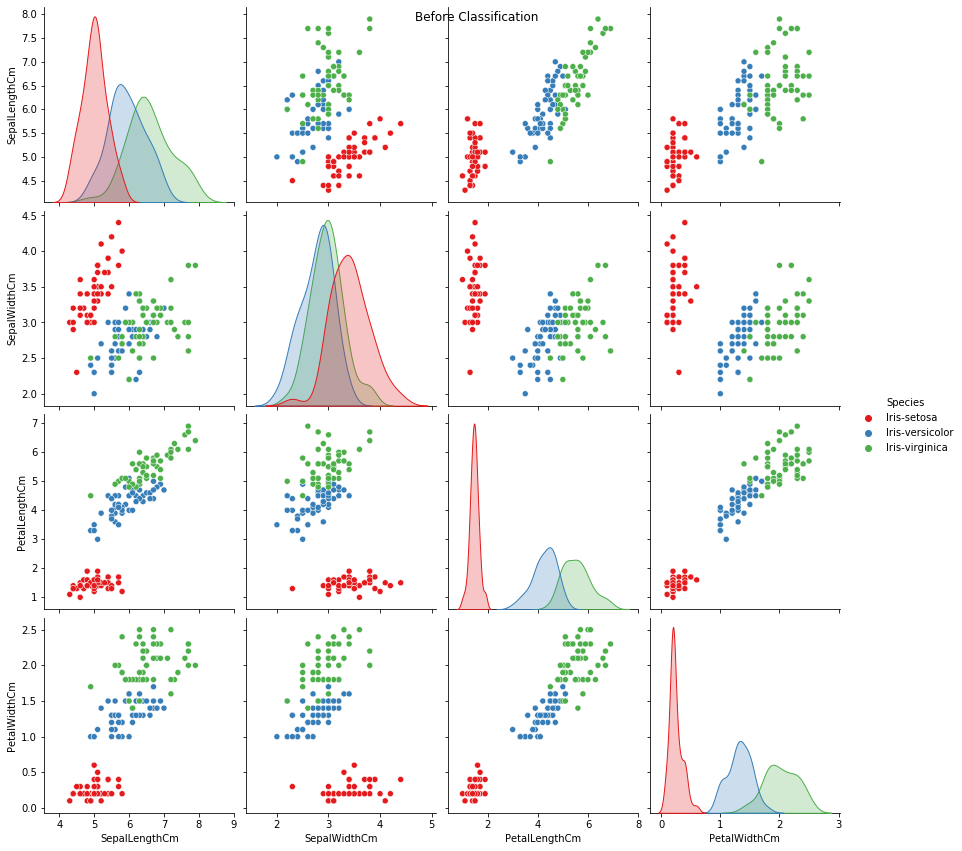

In [55]:
sns.pairplot(data, hue="Species", height=3, palette='Set1').fig.suptitle("Before Classification")

## Data Preparation

In [71]:
# Features variable and label variable is define as X and y
X = data.iloc[:,[0,1,2,3]]
y = data[['Species']]

# split dataset into training and test sets in 80 to 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Model Building

In [72]:
# Initialized Classifier model 
# Trained on training data and made predictions using testing data
clf = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
pred = clf.predict(X_test)

# print performance of the model using classification model
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



From the classification report, the model seems to have good precision and recall for all label classes.

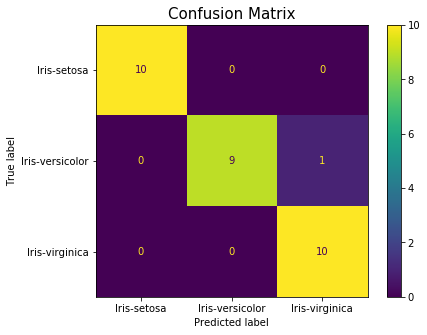

In [73]:
# Plot confusion matrix to see how many classes are predicted correctly.
fig, ax = plt.subplots(figsize=(7, 5))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)

ax.set_title('Confusion Matrix', fontsize=15)
plt.show()

Plot shows almost all classes are correctly classified by the Tree model.

## Plot Dicision Tree

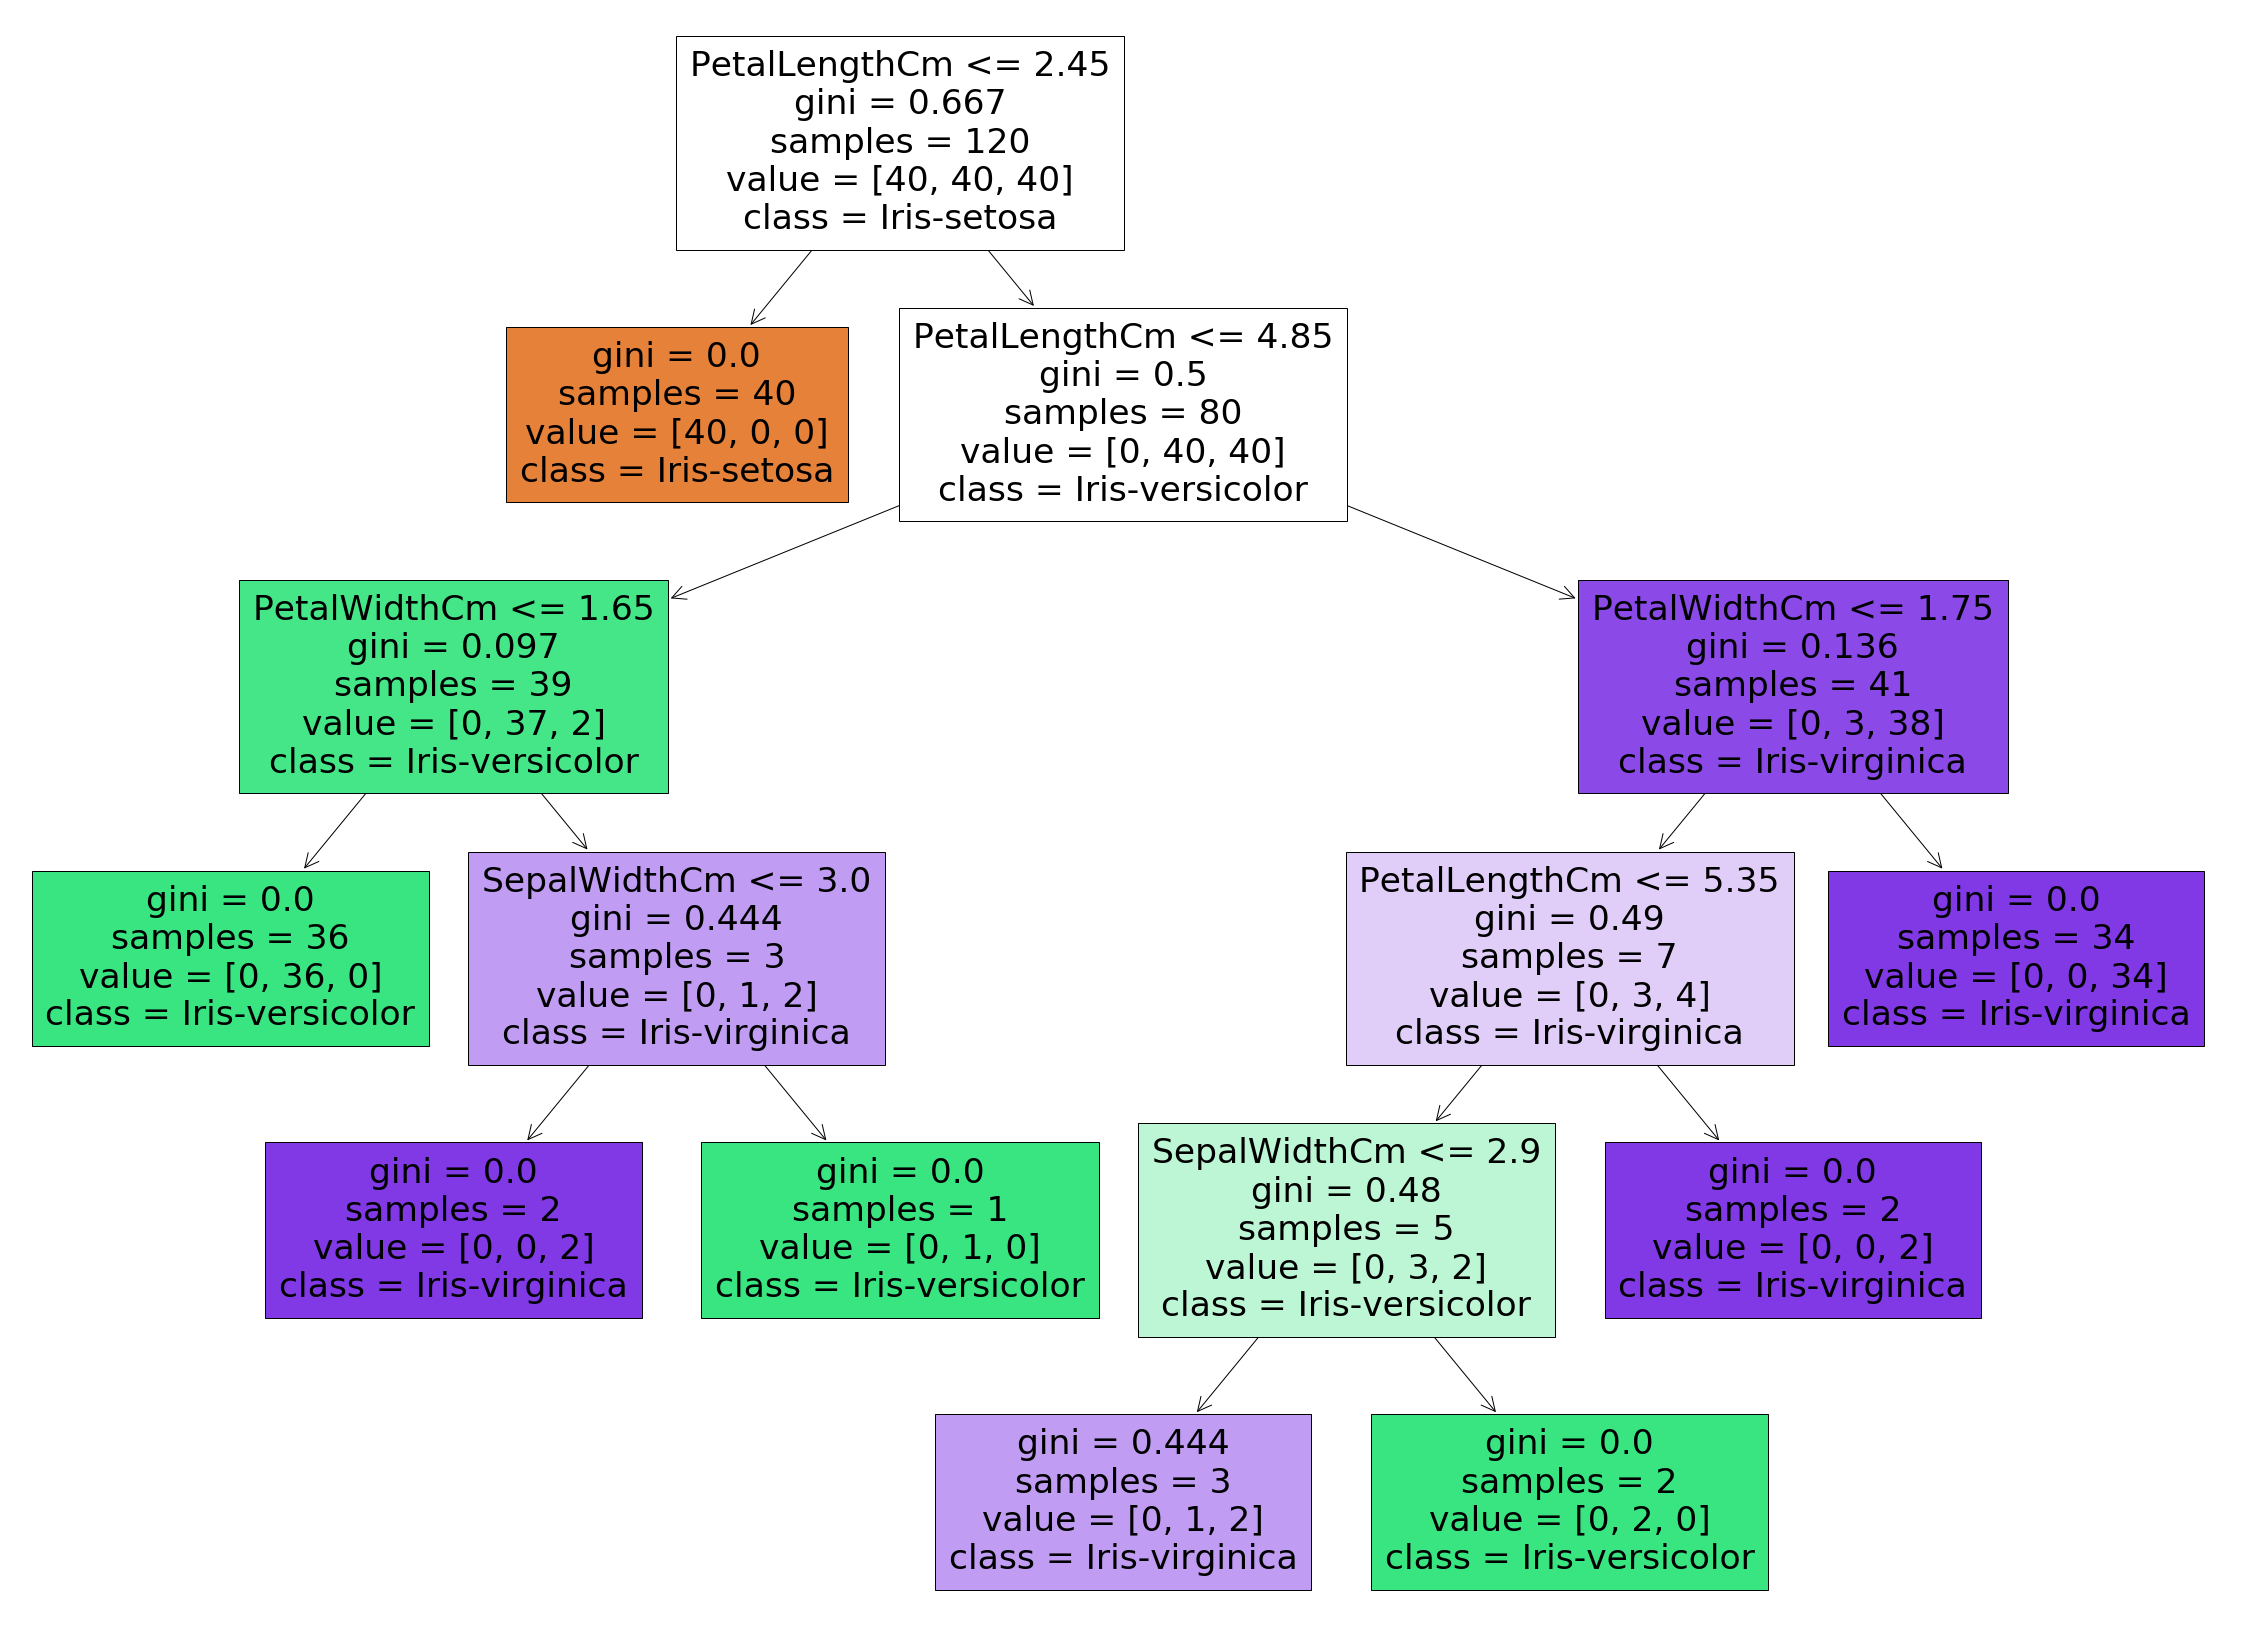

In [76]:
# Potted a Dicision Treeto see how decision made by model

cn=np.unique(data.Species)  # class name 
fn=data.columns[:4]         # featuers name

plt.figure(figsize = (40,30))

plot_tree(clf,feature_names=fn,class_names = cn,filled = True)
plt.show()